## WeatherPy

* Starter code provided below:

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("---------------------------------------------")
print("Ready - Set - Go!!! Let the count begin...")
print("---------------------------------------------")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass

print("---------------------------------------------")    
print("Completed / Finished / End of Count")
print("---------------------------------------------")

---------------------------------------------
Ready - Set - Go!!! Let the count begin...
---------------------------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | manzil tamim
City not found. Skipping...
Processing Record 3 of Set 1 | makakilo city
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | kazachinskoye
Processing Record 6 of Set 1 | bairiki
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bengkalis
City not found. Skipping...
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | mackay
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | okoneshnikovo
Processing Record 16 of Set 1 | mankono
Processing Record 17 of Set 1 | ulladulla
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | marsh harbour
Process

Processing Record 34 of Set 4 | husavik
Processing Record 35 of Set 4 | safonovo
Processing Record 36 of Set 4 | port moresby
Processing Record 37 of Set 4 | westport
Processing Record 38 of Set 4 | ranfurly
Processing Record 39 of Set 4 | kailua
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | karaul
City not found. Skipping...
Processing Record 43 of Set 4 | ust-maya
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | kerema
Processing Record 46 of Set 4 | beira
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | yambio
Processing Record 49 of Set 4 | tacuarembo
Processing Record 50 of Set 4 | inirida
Processing Record 1 of Set 5 | skjervoy
Processing Record 2 of Set 5 | umea
Processing Record 3 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 4 of Set 5 | chokwe
Processing Record 5 of Set 5 | farsund
Processing Record 6 of Set 5 | port shepstone
Proces

Processing Record 26 of Set 8 | nantucket
Processing Record 27 of Set 8 | gasa
Processing Record 28 of Set 8 | vrsac
Processing Record 29 of Set 8 | gusau
Processing Record 30 of Set 8 | doha
Processing Record 31 of Set 8 | addi ugri
City not found. Skipping...
Processing Record 32 of Set 8 | awjilah
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | murupara
Processing Record 35 of Set 8 | najran
Processing Record 36 of Set 8 | sao jose da coroa grande
Processing Record 37 of Set 8 | baza
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | bintulu
Processing Record 40 of Set 8 | limbuhan
Processing Record 41 of Set 8 | arrecife
Processing Record 42 of Set 8 | zuwarah
Processing Record 43 of Set 8 | rodrigues alves
Processing Record 44 of Set 8 | charters towers
Processing Record 45 of Set 8 | carnarvon
Processing Record 46 of Set 8 | kapoeta
Processing Record 47 of Set 8 | natalio
Processing Record 48 of Set 8 | faanui
Processing Record 49 of Set 8

Processing Record 16 of Set 12 | kismayo
Processing Record 17 of Set 12 | ayagoz
Processing Record 18 of Set 12 | ngorongoro
Processing Record 19 of Set 12 | gubskaya
Processing Record 20 of Set 12 | laohekou
Processing Record 21 of Set 12 | uhlove
Processing Record 22 of Set 12 | ulaangom
Processing Record 23 of Set 12 | north bend
Processing Record 24 of Set 12 | redcar
Processing Record 25 of Set 12 | xining
Processing Record 26 of Set 12 | jacareacanga
Processing Record 27 of Set 12 | metu
Processing Record 28 of Set 12 | cam ranh
Processing Record 29 of Set 12 | ugoofaaru
Processing Record 30 of Set 12 | sorland
Processing Record 31 of Set 12 | west odessa
Processing Record 32 of Set 12 | yialos
City not found. Skipping...
Processing Record 33 of Set 12 | ketchikan
Processing Record 34 of Set 12 | sulangan
Processing Record 35 of Set 12 | westminster
Processing Record 36 of Set 12 | jablonne nad orlici
Processing Record 37 of Set 12 | bull savanna
Processing Record 38 of Set 12 | 

### Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("../Output_Data/allcities.csv", index=False, header=True)
weather_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [5]:
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Lincoln,14,AU,1587428090,62,-34.73,135.87,66.61,23.06
1,Makakilo City,1,US,1587427947,61,21.35,-158.09,82.40,8.05
2,Codrington,93,AU,1587428090,67,-38.27,141.97,58.64,18.43
3,Kazachinskoye,28,RU,1587428090,73,57.70,93.28,35.06,8.55
4,Bairiki Village,20,KI,1587428090,70,1.33,172.98,87.80,10.29
5,Punta Arenas,40,CL,1587428090,76,-53.15,-70.92,48.20,5.82
6,Atuona,2,PF,1587428090,72,-9.80,-139.03,82.62,11.23
7,Yellowknife,90,CA,1587428091,57,62.46,-114.35,23.00,6.93
8,Mackay,75,AU,1587428091,88,-21.15,149.20,80.01,12.75
9,Hithadhoo,73,MV,1587428091,70,-0.60,73.08,84.58,8.19


## Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

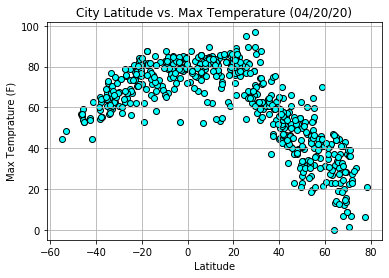

In [6]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("../Images/temperature.png")
plt.show()

### Latitude vs. Humidity Plot

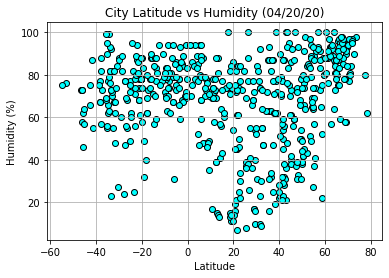

In [7]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

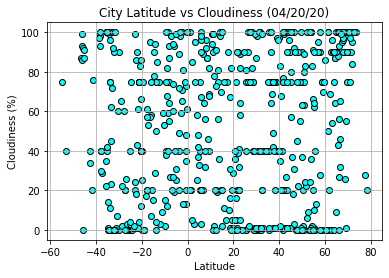

In [8]:
# Create a scatter plot for latitude and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

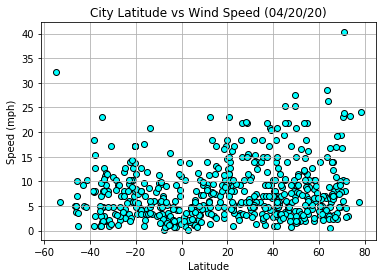

In [9]:
# Create a scatter plot for latitude and wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "cyan", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/wind_speed.png")
plt.show()